In [127]:
import torch
import time

# init variable a, b as 1000 dimension vector
n = 10
a = torch.ones(n)
b = torch.ones(n)
tempt=torch.ones(5,2,out=None)#out的赋值除了是None还能赋予其他什么值
#tempt1=torch.ones(5,2,out=Tensor)
print(tempt)
print(tempt1)

tensor([[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]])
tensor([1., 1., 1., 1., 1.])


In [128]:
# define a timer class to record time
class Timer(object):#这里传入的object是指什么,指前面导入的包time 和 torch
    """Record multiple running times."""
    def __init__(self):
        self.times = []
        self.start()#此处的start函数与下一个start函数的区别,当有此行代码时,在调用类的时候就开始计时,后面调用类后就不用调用start函数,若无此行代码,后面调用类的时候需要调用start函数

    def start(self):
        # start the timer
        self.start_time = time.time()#记录此时的时间

    def stop(self):
        # stop the timer and record time into a list
        self.times.append(time.time() - self.start_time)#记录此时的时间与start函数记录的时间差
        return self.times[-1]

    def avg(self):
        # calculate the average and return
        return sum(self.times)/len(self.times)

    def sum(self):
        # return the sum of recorded time
        return sum(self.times)

In [129]:
timer = Timer()
c = torch.zeros(n)
#timer.start()
for i in range(n):
    c[i] = a[i] + b[i]
'%.5f sec' % timer.stop()

'0.00100 sec'

In [130]:
timer.start()#若不调用start函数,此时输出的结果为这个两次计算用时的和
d = a + b
'%.7f sec' % timer.stop()
print(d)

tensor([2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])


In [89]:
# import packages and modules
%matplotlib inline#将输出的图片显示在页面里而不是弹出一个窗口
import torch
from IPython import display
from matplotlib import pyplot as plt
import numpy as np
import random

print(torch.__version__)

1.4.0+cpu


In [131]:
# set input feature number 
num_inputs = 2
# set example number
num_examples = 1000

# set true weight and bias in order to generate corresponded label
true_w = [2, -3.4]
true_b = 4.2

features = torch.randn(num_examples, num_inputs,
                      dtype=torch.float32)
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()),
                       dtype=torch.float32)#将生成的随机序列转化为tensor形式



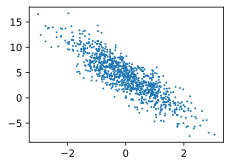

In [136]:
def use_svg_display():
    #display in vector graph
    display.set_matplotlib_formats('svg')
def set_figsize(figsize=(3.5,2.5)):
    use_svg_display()
    #set the size of figure
    plt.rcParams['figure.figsize']=figsize
set_figsize()
plt.scatter(features[:, 1].numpy(), labels.numpy(), 1);

In [168]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)  # random read 10 samples
    for i in range(0, num_examples, batch_size):
        j = torch.LongTensor(indices[i: min(i + batch_size, num_examples)]) # the last time may be not enough for a whole batch
        yield  features.index_select(0, j), labels.index_select(0, j)#yield的用法,此时是一个生成器.会记录函数上一次的值,此处返回的是100组数据
        

In [169]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[-0.4823, -1.2394],
        [-0.0414, -1.0955],
        [ 0.1057, -0.3955],
        [ 0.8282, -0.4684],
        [ 0.5648, -1.3250],
        [-0.5718, -1.0868],
        [ 0.8734, -0.3373],
        [ 0.7502,  0.0696],
        [-0.2862, -0.7234],
        [-1.1131, -1.0563]]) 
 tensor([7.4555, 7.8337, 5.7580, 7.4418, 9.8422, 6.7497, 7.1016, 5.4485, 6.0827,
        5.5629])


In [165]:
w = torch.tensor(np.random.normal(0, 0.01, (num_inputs, 1)), dtype=torch.float32)
b = torch.zeros(1, dtype=torch.float32)

w.requires_grad_(requires_grad=True)
b.requires_grad_(requires_grad=True)#此处要附加梯度,后面优化函数的反向传播需要用到梯度

tensor([0.], requires_grad=True)

In [101]:
def linreg(X, w, b):
    return torch.mm(X, w) + b

In [172]:
def squared_loss(y_hat, y): 
    return (y_hat - y.view(y_hat.size())) ** 2 / 2#view函数的作用是重新构造一个tensor
a = torch.Tensor(3)
print(a)
b=a.view(-1,1)
print(b)
print(b.view(-1))#view(-1)是保持行张量

tensor([0., 0., 0.])
tensor([[0.],
        [0.],
        [0.]])
tensor([0., 0., 0.])


In [173]:
def sgd(params, lr, batch_size): 
    for param in params:
        param.data -= lr * param.grad / batch_size # ues .data to operate param without gradient track

In [104]:
# super parameters init
lr = 0.03
num_epochs = 5

net = linreg
loss = squared_loss

# training
for epoch in range(num_epochs):  # training repeats num_epochs times
    # in each epoch, all the samples in dataset will be used once
    
    # X is the feature and y is the label of a batch sample
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y).sum()  
        # calculate the gradient of batch sample loss 
        l.backward()  
        # using small batch random gradient descent to iter model parameters
        sgd([w, b], lr, batch_size)  
        # reset parameter gradient
        w.grad.data.zero_()
        b.grad.data.zero_()
    train_l = loss(net(features, w, b), labels)
    print('epoch %d, loss %f' % (epoch + 1, train_l.mean().item()))

epoch 1, loss 0.037599
epoch 2, loss 0.000133
epoch 3, loss 0.000050
epoch 4, loss 0.000050
epoch 5, loss 0.000050


In [105]:
w, true_w, b, true_b

(tensor([[ 1.9997],
         [-3.3999]], requires_grad=True),
 [2, -3.4],
 tensor([4.2000], requires_grad=True),
 4.2)

In [174]:
import torch
from torch import nn
import numpy as np
torch.manual_seed(1)

print(torch.__version__)
torch.set_default_tensor_type('torch.FloatTensor')

1.4.0+cpu


In [175]:
num_inputs = 2
num_examples = 1000

true_w = [2, -3.4]
true_b = 4.2

features = torch.tensor(np.random.normal(0, 1, (num_examples, num_inputs)), dtype=torch.float)
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()), dtype=torch.float)

In [176]:
import torch.utils.data as Data

batch_size = 10

# combine featues and labels of dataset
dataset = Data.TensorDataset(features, labels)

# put dataset into DataLoader
data_iter = Data.DataLoader(
    dataset=dataset,            # torch TensorDataset format
    batch_size=batch_size,      # mini batch size
    shuffle=True,               # whether shuffle the data or not
    num_workers=2,              # read data in multithreading
)

In [177]:
for X, y in data_iter:
    print(X, '\n', y)
    break

tensor([[ 0.3151,  1.4219],
        [-0.9385, -0.1596],
        [-0.4356, -0.4555],
        [ 0.6825, -0.7142],
        [-0.2754,  0.3993],
        [ 2.4996, -0.1157],
        [ 0.1493, -0.6179],
        [ 0.0469,  0.4362],
        [-0.0773,  0.4088],
        [ 1.7400, -0.6714]]) 
 tensor([-2.0386e-03,  2.8681e+00,  4.8786e+00,  7.9801e+00,  2.2928e+00,
         9.5954e+00,  6.5843e+00,  2.7940e+00,  2.6481e+00,  9.9605e+00])


In [178]:
class LinearNet(nn.Module):
    def __init__(self, n_feature):
        super(LinearNet, self).__init__()      # call father function to init 
        self.linear = nn.Linear(n_feature, 1)  # function prototype: `torch.nn.Linear(in_features, out_features, bias=True)`

    def forward(self, x):
        y = self.linear(x)
        return y
    
net = LinearNet(num_inputs)
print(net)

LinearNet(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)


In [186]:
# ways to init a multilayer network
# method one
net = nn.Sequential(
    nn.Linear(num_inputs, 1),
    # other layers can be added here
    )

# method two
net = nn.Sequential()
net.add_module('linear', nn.Linear(num_inputs, 1))
# net.add_module ......

# method three
from collections import OrderedDict
net = nn.Sequential(OrderedDict([
          ('linear', nn.Linear(num_inputs, 1))
          # ......
        ]))

print(net)
print(net[0])

Sequential(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)
Linear(in_features=2, out_features=1, bias=True)


In [187]:
from torch.nn import init

init.normal_(net[0].weight, mean=0.0, std=0.01)
init.constant_(net[0].bias, val=0.0)  # or you can use `net[0].bias.data.fill_(0)` to modify it directly

Parameter containing:
tensor([0.], requires_grad=True)

In [188]:
for param in net.parameters():
    print(param)

Parameter containing:
tensor([[-0.0109, -0.0210]], requires_grad=True)
Parameter containing:
tensor([0.], requires_grad=True)


In [189]:
loss = nn.MSELoss()    # nn built-in squared loss function
                       # function prototype: `torch.nn.MSELoss(size_average=None, reduce=None, reduction='mean')

In [190]:
import torch.optim as optim

optimizer = optim.SGD(net.parameters(), lr=0.03)   # built-in random gradient descent function
print(optimizer)  # function prototype: `torch.optim.SGD(params, lr=, momentum=0, dampening=0, weight_decay=0, nesterov=False)

SGD (
Parameter Group 0
    dampening: 0
    lr: 0.03
    momentum: 0
    nesterov: False
    weight_decay: 0
)
